<h1>GameScores, INC. Ratings Prediction</h1>
<p>Alex Polefko</p>
<p>Welcome to the GameScores, INC. application for ratings prediction with linear regression. There are many game companies, or developers, and this model will help predict ratings based on wishlist values from the main data set and can be trained with Nintendo, Sony, or "all" games (from the data set 1980-2023).</p>

<h2>User Guide</h2>
<p>Please reference the documentation attached with the submission, but, in general, all dependencies should function and code can be run by selecting a "cell" then clicking the "play" button or CRTL+Enter/CMD+Enter.</p>
<p>Additionally, the "double arrow" which will Restart and Run the whole Notebook.</p>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# gamesNoDup.csv had any games with BLANK ratings and BLANK team, removed
myDataframe = pd.read_csv("gamesNoDup.csv")
filterByNintendo = myDataframe.loc[myDataframe['Team'].str.contains('Nintendo')]
# print(filterByNintendo)
filterBySony = myDataframe.loc[myDataframe['Team'].str.contains('Sony')]
# print(filterBySony)

<h1>Visualizations (Descriptive)</h1>

<p>Below are three visulazations, including the scatter matrix representing a descriptive method and the scatter plot to assist with the linear regression machine learning algorithm.</p>

array([[<Axes: xlabel='Unnamed: 0', ylabel='Unnamed: 0'>,
        <Axes: xlabel='Rating', ylabel='Unnamed: 0'>,
        <Axes: xlabel='Wishlist', ylabel='Unnamed: 0'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='Rating'>,
        <Axes: xlabel='Rating', ylabel='Rating'>,
        <Axes: xlabel='Wishlist', ylabel='Rating'>],
       [<Axes: xlabel='Unnamed: 0', ylabel='Wishlist'>,
        <Axes: xlabel='Rating', ylabel='Wishlist'>,
        <Axes: xlabel='Wishlist', ylabel='Wishlist'>]], dtype=object)

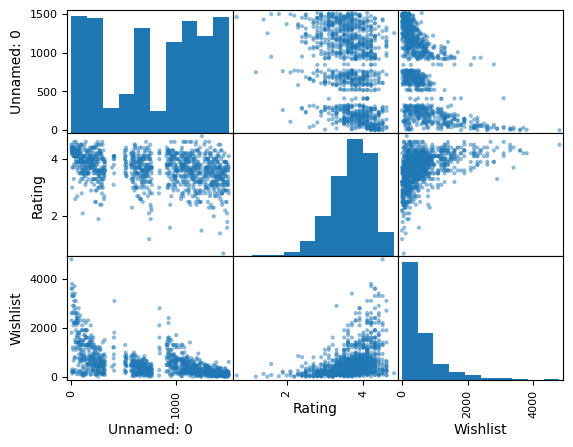

In [3]:
scatter_matrix(myDataframe)

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Wishlist'}>, <Axes: >]], dtype=object)

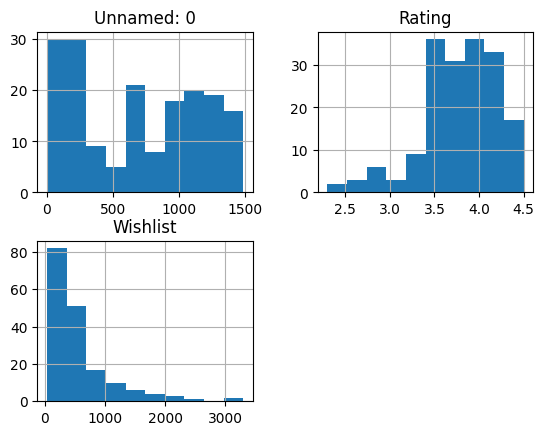

In [4]:
filterByNintendo.hist()

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Wishlist'}>, <Axes: >]], dtype=object)

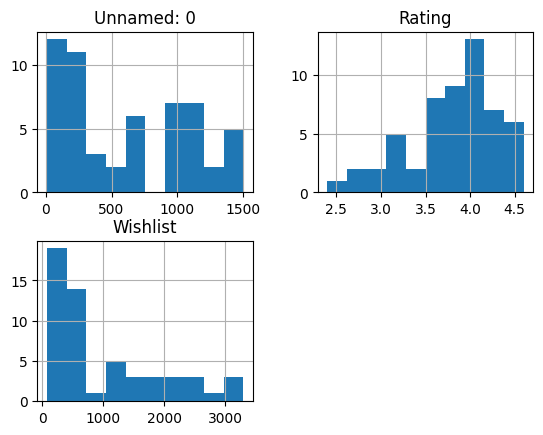

In [5]:
filterBySony.hist()

<h1>Interact with the model based on All, Nintendo, or Sony</h1>

<h3>Including non-descriptive method with final visualization</h3>

In [6]:

devRequest = input("Type 'All' exactly for all games OR type 'Nintendo' exactly for Nintendo associated games OR type "
                   "'Sony' for Sony associated games")

Type 'All' exactly for all games OR type 'Nintendo' exactly for Nintendo associated games OR type 'Sony' for Sony associated games All


<h3>Game Ratings and Wishlists: Machine Learning using Linear Regression</h3>

<p>Independent variable = Wishlist and Dependent Variable = Ratings (to be predicted)</p>

Coefficient of determination accuracy rating below:
0.13358219864912801


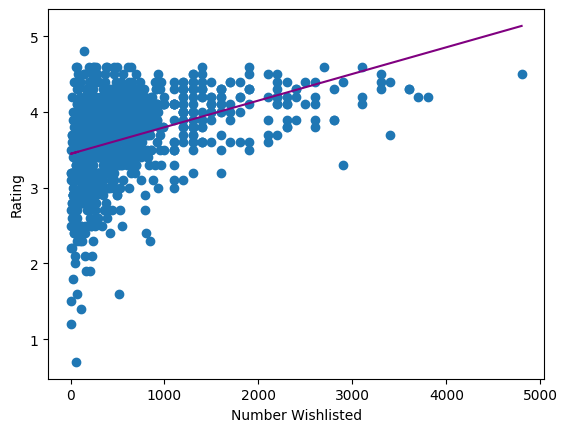

In [7]:
if devRequest == 'Nintendo':
    independent_var = filterByNintendo.iloc[:, 13].values.reshape(-1, 1)  # x, wishlist
    dependent_var = filterByNintendo.iloc[:, 4].values.reshape(-1, 1)  # y, ratings
elif devRequest == 'Sony':
    independent_var = filterBySony.iloc[:, 13].values.reshape(-1, 1)  # wishlist
    dependent_var = filterBySony.iloc[:, 4].values.reshape(-1, 1)  # ratings
else:
    independent_var = myDataframe.iloc[:, 13].values.reshape(-1, 1)  # wishlist
    dependent_var = myDataframe.iloc[:, 4].values.reshape(-1, 1)  # ratings
    
X_wishlist_train, X_wishlist_test, y_ratings_train, y_ratings_test = train_test_split(independent_var, dependent_var,
                                                                                      test_size=0.2, random_state=20)
primaryModel = LinearRegression()

# Training
primaryModel.fit(X_wishlist_train, y_ratings_train)
y_prediction_training = primaryModel.predict(X_wishlist_train)
# accuracyRatingsTraining = r2_score(y_ratings_train, y_prediction_training)


# Testing
y_prediction_testing = primaryModel.predict(X_wishlist_test)
accuracyRatings = r2_score(y_ratings_test, y_prediction_testing)
print("Coefficient of determination accuracy rating below:")
print(accuracyRatings)


# Display
y_prediction = primaryModel.predict(independent_var)
pyplot.scatter(independent_var, dependent_var)
pyplot.plot(independent_var, y_prediction, color="purple")
pyplot.xlabel("Number Wishlisted")
pyplot.ylabel("Rating")
pyplot.show()

<h2>Accuracy Metric</h2>
<p>R^2 Score, or coefficient of determination, was used as the accuracy measurement. Please refer to documentation attached with submission for more information.</p>